##[장르별 분석] 

- 발라드 가사를 문장 생성 모델 학습에 선정한 이유








In [1]:
# 마운트

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


---




##1. 장르별 특성을 추출하기 위한 단계
- 인디, 국악, 힙합, 발라드, 트로트, 록/메탈, 포크/블루스, 댄스, RnB 등의 장르 시각화 분석을 통한 insight 도출 시도

- 가사 길이 시각화, 워드 클라우드 활용 등으로 가시성 확보

- 통일성을 위해 같은 코드로 시각화

- 조원 분들의 eda 참고(지영님, 자현님, 종현님, 의준님, 지혜님) 및 통합


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pt
import seaborn as sns
import re
from wordcloud import WordCloud

In [180]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 4.7 MB/s 


In [103]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [105]:
# 내장 폰트 확인

import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

plt.rc('font', family='NanumBarunGothic')

In [108]:
from matplotlib import rc

rc('font', family='NanumBarunGothic')

In [3]:
# konlpy

!pip install konlpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 45.9 MB/s 


In [96]:
# 그래프에 retina display 적용


%config InlineBackend.figure_format = 'retina'
pd.options.display.max_colwidth = 3000

In [544]:
# 장르 데이터 파일 블러오기

# 멜론_가사_인디_인기.csv
# 록메탈_data.csv
# 국악_data.csv
# trot_data.csv
# rnb_data.csv
# hiphop_data.csv
# folkblues_data.csv
# dance_data.csv
# ballad_data.csv


data = pd.read_csv("/gdrive/My Drive/파데/ballad_data.csv")
data.head()

# , index_col="Unnamed: 0"

,제목,가사,가수,발매일,좋아요수,장르
0,Monologue,다 잊었다는 거짓말\n또 해 버렸죠\n내 마음에 그대란 사람\n없다고 했죠\n너무나 쉽게 잊혀졌다고\n이젠 남이라고\n서툰 내 사랑에 지쳐 떠난 그대\n너무 많이 울려서\n잡을 용기조차 낼 수 없었죠\n미안해요 내 사랑아\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n많이 부족한 나를 사랑한 그대\n이거면 됐어요 더 이상은\n그대 불행하지 않도록\n나 이쯤에서 없어지는 게\n그댈 위한 나의 사랑인 걸요\n너무 투명해서 때론 불안했죠\n제멋대로 살아온 나를\n감당할 수 없을 것 같죠\n미안해요 내 사랑아\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n고마웠어요 나를 사랑해 줘서\n나 같은 사람이 두 번 다시\n감히 받을 수 없는 사랑\n그대 때문에 행복했어요\n울지 마요 그대\n잘 생각해 봐요\n나쁜 일들만 가득했던 우리\n다 잊어야 해요\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n많이 부족한 나를 사랑한 그대\n이거면 됐어요\n더 이상은 그대 불행하지 않도록\n나 이쯤에서 없어지는 게\n그댈 위한 나의 사랑인 걸요,테이,2022.09.18,"66,062",발라드
1,너의 모든 순간,이윽고 내가 한눈에\n너를 알아봤을 때\n모든 건 분명 달라지고 있었어\n내 세상은 널 알기 전과 후로 나뉘어\n니가 숨 쉬면 따스한 바람이 불어와\n니가 웃으면 눈부신 햇살이 비춰\n거기 있어줘서 그게 너라서\n가끔 내 어깨에 가만히 기대주어서\n나는 있잖아 정말 빈틈없이 행복해\n너를 따라서 시간은 흐르고 멈춰\n물끄러미 너를 들여다 보곤 해\n그것 말고는 아무것도 할 수 없어서\n너의 모든 순간 그게\n나였으면 좋겠다\n생각만 해도 가슴이 차올라\n나는 온통 너로\n보고 있으면 왠지 꿈처럼 아득한 것\n몇 광년 동안 날 향해 날아온 별빛\n또 지금의 너\n거기 있어줘서 그게 너라서\n가끔 나에게 조용하게 안겨주어서\n나는 있잖아 정말 남김없이 고마워\n너를 따라서 시간은 흐르고 멈춰\n물끄러미 너를 들여다보곤 해\n너를 보는 게 나에게는 사랑이니까\n너의 모든 순간 그게\n나였으면 좋겠다\n생각만 해도 가슴이 차올라\n나는 온통 너로\n니 모든 순간 나였으면,성시경,2014.02.12,"243,092","발라드, 국내드라마"
2,잘가요,"미안해 마요 이제야 난 깨달아요\n내 절대 그대 짝이 아님을\n괜찮을게요 영혼 밖에 팔 것 없는\n못난 날 잘 비켜갔어요\n그대 행복 내가 꼭 아니라도\n지킨다면 그게 사랑일 테죠\n그게 나의 몫이죠\n잘 가요 내 소중한 사람\n행복했어요\n그래도 이것만 알아줘요\n지금 그 사랑보다\n결코 내 사랑이\n부족하다거나 얕지 않음을\n잊어도 돼요 나를 만난 시간들은\n잠깐의 연극이라 여김을\n잘한 거예요 아무리 난 노력해도\n작은 희망도 없잖아요\n아주 멀리, 멀리 뛰어가세요\n어떡해요 자꾸 잘못한 일만\n떠오르는 걸\n잘 가요 내 소중한 사람\n행복했어요\n그래도 이것만 알아줘요\n지금 그 사랑보다 결코 내 사랑이\n부족하다거나 얕지 않음을\n어긋난 인연이 남겨놓은 사랑이란\n날카로운 슬픔이군요\n잘 가요 내 사랑아 고마웠어요\n그래도 이것만 알아줘요\n지금 그 사랑보다 결코 내 사랑이\n부족하다거나 얕지 않음을\n부족하다거나 얕지 않음을",주호,2022.12.04,"18,702",발라드
3,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가슴만 떨었지\n내 아름답던 사람아\n사랑이란 게 참 쓰린 거더라\n잡으려 할수록 더 멀어지더라\n이별이란 게 참 쉬운 거더라\n내 잊지 못할 사람아\n사랑아 왜 도망가\n수줍은 아이처럼\n행여 놓아버릴까 봐\n꼭 움켜쥐지만\n그리움이 쫓아 사랑은 늘 도망가\n잠시 쉬어가면 좋을 텐데\n바람이 분다 옷깃을 세워도\n차가운 이별의 눈물이 차올라\n잊지 못해서 가슴에 사무친\n내 소중했던 사람아\n사랑아 왜 도망가\n수줍은 아이처럼\n행여 놓아버릴까 봐\n꼭 움켜쥐지만\n그리움이 쫓아 사랑은 늘 도망가\n잠시 쉬어가면 좋을 텐데\n기다림도 애태움도 다 버려야 하는데\n무얼 찾아 이 길을 서성일까\n무얼 찾아 여기 있나\n사랑아 왜 도망가\n수줍은 아이처럼\n행여 놓아버릴까 봐\n꼭 움켜쥐지만\n그리움이 쫓아 사랑은 늘 도망가\n잠시 쉬어가면 좋을 텐데\n잠시 쉬어가면 좋을 텐데,임영웅,2021.10.11,"185,585","발라드, 국내드라마"
4,해요 (2022),그녀와 나는요 그땐 참 어렸어요\n많이 사랑했고 때론 많이 다퉜었죠\n지금 생각하면 모두 내 잘못이죠\n마지막 그날도 그녀는 울었어\n나는 그녈 잡지 못했죠\n지금까지도 너무 후회가 돼요\n그 후로 누굴 사랑한 적 없어 아직은\n그녀와 나는요\n언젠가 만날 거죠\n변해버린 모습 변해버린 시간 속에\n하지만 괜찮아 내 눈엔 아름답던\n예전 모습 그대로 일 거예요\n그녀도 날 못 잊을 거야 나는 믿어요\n그만큼 사랑했죠\n그래서 우린 한 번은 만나야만 해요\n그녀의 친구라도 이 노랠 듣는다면\n그녀에게 전해줘요\n내가 아직 사랑한다고\n우리가 처음 만난 그 시간 그 자리에\n내가 매일 기다린다고\n언제라도\n그녀도 날 못 잊을 거야 나는 믿어요\n그만큼 사랑했죠\n그래서 우린 한 번은 만나야만 해요\n그녀의 친구라도 이 노랠 듣는다면\n그녀에게 전해줘요\n내가 아직 사랑한다고\n우리가 처음 만난 그 시간 그 자리에\n내가 매일 기다린다고\n그녀의 친구라도 이 노랠 듣는다면\n그녀에게 전해줘요\n내가 아직 사랑한다고\n우리가 처음 만난 그 시간 그 자리에\n내가 매일 기다린다고\n내가 매일 기다린다고,#안녕,2022.06.07,"63,808","발라드, 인디음악"


In [545]:
# 중복 제거

data = data.drop_duplicates()

In [546]:
data.shape

(13130, 6)

In [547]:
data["가사"][:1]

0    다 잊었다는 거짓말\n또 해 버렸죠\n내 마음에 그대란 사람\n없다고 했죠\n너무나 쉽게 잊혀졌다고\n이젠 남이라고\n서툰 내 사랑에 지쳐 떠난 그대\n너무 많이 울려서\n잡을 용기조차 낼 수 없었죠\n미안해요 내 사랑아\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n많이 부족한 나를 사랑한 그대\n이거면 됐어요 더 이상은\n그대 불행하지 않도록\n나 이쯤에서 없어지는 게\n그댈 위한 나의 사랑인 걸요\n너무 투명해서 때론 불안했죠\n제멋대로 살아온 나를\n감당할 수 없을 것 같죠\n미안해요 내 사랑아\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n고마웠어요 나를 사랑해 줘서\n나 같은 사람이 두 번 다시\n감히 받을 수 없는 사랑\n그대 때문에 행복했어요\n울지 마요 그대\n잘 생각해 봐요\n나쁜 일들만 가득했던 우리\n다 잊어야 해요\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n많이 부족한 나를 사랑한 그대\n이거면 됐어요\n더 이상은 그대 불행하지 않도록\n나 이쯤에서 없어지는 게\n그댈 위한 나의 사랑인 걸요
Name: 가사, dtype: object

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13130 entries, 0 to 13345
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      13130 non-null  object
 1   가사      13130 non-null  object
 2   가수      13130 non-null  object
 3   발매일     13130 non-null  object
 4   좋아요수    13130 non-null  object
 5   장르      13130 non-null  object
dtypes: object(6)
memory usage: 718.0+ KB


In [549]:
df = data.copy()
df.head()

,제목,가사,가수,발매일,좋아요수,장르
0,Monologue,다 잊었다는 거짓말\n또 해 버렸죠\n내 마음에 그대란 사람\n없다고 했죠\n너무나 쉽게 잊혀졌다고\n이젠 남이라고\n서툰 내 사랑에 지쳐 떠난 그대\n너무 많이 울려서\n잡을 용기조차 낼 수 없었죠\n미안해요 내 사랑아\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n많이 부족한 나를 사랑한 그대\n이거면 됐어요 더 이상은\n그대 불행하지 않도록\n나 이쯤에서 없어지는 게\n그댈 위한 나의 사랑인 걸요\n너무 투명해서 때론 불안했죠\n제멋대로 살아온 나를\n감당할 수 없을 것 같죠\n미안해요 내 사랑아\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n고마웠어요 나를 사랑해 줘서\n나 같은 사람이 두 번 다시\n감히 받을 수 없는 사랑\n그대 때문에 행복했어요\n울지 마요 그대\n잘 생각해 봐요\n나쁜 일들만 가득했던 우리\n다 잊어야 해요\n다신 나 같은 사람 만나지 마요\n혹시 찾아가도 두 번 다시\n나를 허락해 주지 마요\n그댄 여리고 너무 착해서\n싫단 말도 잘 못하는데\n많이 부족한 나를 사랑한 그대\n이거면 됐어요\n더 이상은 그대 불행하지 않도록\n나 이쯤에서 없어지는 게\n그댈 위한 나의 사랑인 걸요,테이,2022.09.18,"66,062",발라드
1,너의 모든 순간,이윽고 내가 한눈에\n너를 알아봤을 때\n모든 건 분명 달라지고 있었어\n내 세상은 널 알기 전과 후로 나뉘어\n니가 숨 쉬면 따스한 바람이 불어와\n니가 웃으면 눈부신 햇살이 비춰\n거기 있어줘서 그게 너라서\n가끔 내 어깨에 가만히 기대주어서\n나는 있잖아 정말 빈틈없이 행복해\n너를 따라서 시간은 흐르고 멈춰\n물끄러미 너를 들여다 보곤 해\n그것 말고는 아무것도 할 수 없어서\n너의 모든 순간 그게\n나였으면 좋겠다\n생각만 해도 가슴이 차올라\n나는 온통 너로\n보고 있으면 왠지 꿈처럼 아득한 것\n몇 광년 동안 날 향해 날아온 별빛\n또 지금의 너\n거기 있어줘서 그게 너라서\n가끔 나에게 조용하게 안겨주어서\n나는 있잖아 정말 남김없이 고마워\n너를 따라서 시간은 흐르고 멈춰\n물끄러미 너를 들여다보곤 해\n너를 보는 게 나에게는 사랑이니까\n너의 모든 순간 그게\n나였으면 좋겠다\n생각만 해도 가슴이 차올라\n나는 온통 너로\n니 모든 순간 나였으면,성시경,2014.02.12,"243,092","발라드, 국내드라마"
2,잘가요,"미안해 마요 이제야 난 깨달아요\n내 절대 그대 짝이 아님을\n괜찮을게요 영혼 밖에 팔 것 없는\n못난 날 잘 비켜갔어요\n그대 행복 내가 꼭 아니라도\n지킨다면 그게 사랑일 테죠\n그게 나의 몫이죠\n잘 가요 내 소중한 사람\n행복했어요\n그래도 이것만 알아줘요\n지금 그 사랑보다\n결코 내 사랑이\n부족하다거나 얕지 않음을\n잊어도 돼요 나를 만난 시간들은\n잠깐의 연극이라 여김을\n잘한 거예요 아무리 난 노력해도\n작은 희망도 없잖아요\n아주 멀리, 멀리 뛰어가세요\n어떡해요 자꾸 잘못한 일만\n떠오르는 걸\n잘 가요 내 소중한 사람\n행복했어요\n그래도 이것만 알아줘요\n지금 그 사랑보다 결코 내 사랑이\n부족하다거나 얕지 않음을\n어긋난 인연이 남겨놓은 사랑이란\n날카로운 슬픔이군요\n잘 가요 내 사랑아 고마웠어요\n그래도 이것만 알아줘요\n지금 그 사랑보다 결코 내 사랑이\n부족하다거나 얕지 않음을\n부족하다거나 얕지 않음을",주호,2022.12.04,"18,702",발라드
3,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가슴만 떨었지\n내 아름답던 사람아\n사랑이란 게 참 쓰린 거더라\n잡으려 할수록 더 멀어지더라\n이별이란 게 참 쉬운 거더라\n내 잊지 못할 사람아\n사랑아 왜 도망가\n수줍은 아이처럼\n행여 놓아버릴까 봐\n꼭 움켜쥐지만\n그리움이 쫓아 사랑은 늘 도망가\n잠시 쉬어가면 좋을 텐데\n바람이 분다 옷깃을 세워도\n차가운 이별의 눈물이 차올라\n잊지 못해서 가슴에 사무친\n내 소중했던 사람아\n사랑아 왜 도망가\n수줍은 아이처럼\n행여 놓아버릴까 봐\n꼭 움켜쥐지만\n그리움이 쫓아 사랑은 늘 도망가\n잠시 쉬어가면 좋을 텐데\n기다림도 애태움도 다 버려야 하는데\n무얼 찾아 이 길을 서성일까\n무얼 찾아 여기 있나\n사랑아 왜 도망가\n수줍은 아이처럼\n행여 놓아버릴까 봐\n꼭 움켜쥐지만\n그리움이 쫓아 사랑은 늘 도망가\n잠시 쉬어가면 좋을 텐데\n잠시 쉬어가면 좋을 텐데,임영웅,2021.10.11,"185,585","발라드, 국내드라마"
4,해요 (2022),그녀와 나는요 그땐 참 어렸어요\n많이 사랑했고 때론 많이 다퉜었죠\n지금 생각하면 모두 내 잘못이죠\n마지막 그날도 그녀는 울었어\n나는 그녈 잡지 못했죠\n지금까지도 너무 후회가 돼요\n그 후로 누굴 사랑한 적 없어 아직은\n그녀와 나는요\n언젠가 만날 거죠\n변해버린 모습 변해버린 시간 속에\n하지만 괜찮아 내 눈엔 아름답던\n예전 모습 그대로 일 거예요\n그녀도 날 못 잊을 거야 나는 믿어요\n그만큼 사랑했죠\n그래서 우린 한 번은 만나야만 해요\n그녀의 친구라도 이 노랠 듣는다면\n그녀에게 전해줘요\n내가 아직 사랑한다고\n우리가 처음 만난 그 시간 그 자리에\n내가 매일 기다린다고\n언제라도\n그녀도 날 못 잊을 거야 나는 믿어요\n그만큼 사랑했죠\n그래서 우린 한 번은 만나야만 해요\n그녀의 친구라도 이 노랠 듣는다면\n그녀에게 전해줘요\n내가 아직 사랑한다고\n우리가 처음 만난 그 시간 그 자리에\n내가 매일 기다린다고\n그녀의 친구라도 이 노랠 듣는다면\n그녀에게 전해줘요\n내가 아직 사랑한다고\n우리가 처음 만난 그 시간 그 자리에\n내가 매일 기다린다고\n내가 매일 기다린다고,#안녕,2022.06.07,"63,808","발라드, 인디음악"


In [550]:
# /n 제거 및 한글만 남김 => 문장 생성 처음에는 다른 언어가 섞일 시 제대로 된 문장이 생성되지 않을 수 있음
# 추후 영어 및 다른 언어 포함가능


# for i in range(len(data)):
#     df["가사"][i] = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ",df["가사"][i])

# # 숫자, 영어, 한글만 남기고 싶을 때: [^A-Za-z0-9가-힣]

# df["가사"]


import re

for i in range(len(df)):
    df["가사"][i] = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ", df["가사"].iloc[i])
    
    
df.head()


,제목,가사,가수,발매일,좋아요수,장르
0,Monologue,다 잊었다는 거짓말 또 해 버렸죠 내 마음에 그대란 사람 없다고 했죠 너무나 쉽게 잊혀졌다고 이젠 남이라고 서툰 내 사랑에 지쳐 떠난 그대 너무 많이 울려서 잡을 용기조차 낼 수 없었죠 미안해요 내 사랑아 다신 나 같은 사람 만나지 마요 혹시 찾아가도 두 번 다시 나를 허락해 주지 마요 그댄 여리고 너무 착해서 싫단 말도 잘 못하는데 많이 부족한 나를 사랑한 그대 이거면 됐어요 더 이상은 그대 불행하지 않도록 나 이쯤에서 없어지는 게 그댈 위한 나의 사랑인 걸요 너무 투명해서 때론 불안했죠 제멋대로 살아온 나를 감당할 수 없을 것 같죠 미안해요 내 사랑아 다신 나 같은 사람 만나지 마요 혹시 찾아가도 두 번 다시 나를 허락해 주지 마요 그댄 여리고 너무 착해서 싫단 말도 잘 못하는데 고마웠어요 나를 사랑해 줘서 나 같은 사람이 두 번 다시 감히 받을 수 없는 사랑 그대 때문에 행복했어요 울지 마요 그대 잘 생각해 봐요 나쁜 일들만 가득했던 우리 다 잊어야 해요 다신 나 같은 사람 만나지 마요 혹시 찾아가도 두 번 다시 나를 허락해 주지 마요 그댄 여리고 너무 착해서 싫단 말도 잘 못하는데 많이 부족한 나를 사랑한 그대 이거면 됐어요 더 이상은 그대 불행하지 않도록 나 이쯤에서 없어지는 게 그댈 위한 나의 사랑인 걸요,테이,2022.09.18,"66,062",발라드
1,너의 모든 순간,이윽고 내가 한눈에 너를 알아봤을 때 모든 건 분명 달라지고 있었어 내 세상은 널 알기 전과 후로 나뉘어 니가 숨 쉬면 따스한 바람이 불어와 니가 웃으면 눈부신 햇살이 비춰 거기 있어줘서 그게 너라서 가끔 내 어깨에 가만히 기대주어서 나는 있잖아 정말 빈틈없이 행복해 너를 따라서 시간은 흐르고 멈춰 물끄러미 너를 들여다 보곤 해 그것 말고는 아무것도 할 수 없어서 너의 모든 순간 그게 나였으면 좋겠다 생각만 해도 가슴이 차올라 나는 온통 너로 보고 있으면 왠지 꿈처럼 아득한 것 몇 광년 동안 날 향해 날아온 별빛 또 지금의 너 거기 있어줘서 그게 너라서 가끔 나에게 조용하게 안겨주어서 나는 있잖아 정말 남김없이 고마워 너를 따라서 시간은 흐르고 멈춰 물끄러미 너를 들여다보곤 해 너를 보는 게 나에게는 사랑이니까 너의 모든 순간 그게 나였으면 좋겠다 생각만 해도 가슴이 차올라 나는 온통 너로 니 모든 순간 나였으면,성시경,2014.02.12,"243,092","발라드, 국내드라마"
2,잘가요,미안해 마요 이제야 난 깨달아요 내 절대 그대 짝이 아님을 괜찮을게요 영혼 밖에 팔 것 없는 못난 날 잘 비켜갔어요 그대 행복 내가 꼭 아니라도 지킨다면 그게 사랑일 테죠 그게 나의 몫이죠 잘 가요 내 소중한 사람 행복했어요 그래도 이것만 알아줘요 지금 그 사랑보다 결코 내 사랑이 부족하다거나 얕지 않음을 잊어도 돼요 나를 만난 시간들은 잠깐의 연극이라 여김을 잘한 거예요 아무리 난 노력해도 작은 희망도 없잖아요 아주 멀리 멀리 뛰어가세요 어떡해요 자꾸 잘못한 일만 떠오르는 걸 잘 가요 내 소중한 사람 행복했어요 그래도 이것만 알아줘요 지금 그 사랑보다 결코 내 사랑이 부족하다거나 얕지 않음을 어긋난 인연이 남겨놓은 사랑이란 날카로운 슬픔이군요 잘 가요 내 사랑아 고마웠어요 그래도 이것만 알아줘요 지금 그 사랑보다 결코 내 사랑이 부족하다거나 얕지 않음을 부족하다거나 얕지 않음을,주호,2022.12.04,"18,702",발라드
3,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면 그 사람 손길이 자꾸 생각이 난다 붙잡지 못하고 가슴만 떨었지 내 아름답던 사람아 사랑이란 게 참 쓰린 거더라 잡으려 할수록 더 멀어지더라 이별이란 게 참 쉬운 거더라 내 잊지 못할 사람아 사랑아 왜 도망가 수줍은 아이처럼 행여 놓아버릴까 봐 꼭 움켜쥐지만 그리움이 쫓아 사랑은 늘 도망가 잠시 쉬어가면 좋을 텐데 바람이 분다 옷깃을 세워도 차가운 이별의 눈물이 차올라 잊지 못해서 가슴에 사무친 내 소중했던 사람아 사랑아 왜 도망가 수줍은 아이처럼 행여 놓아버릴까 봐 꼭 움켜쥐지만 그리움이 쫓아 사랑은 늘 도망가 잠시 쉬어가면 좋을 텐데 기다림도 애태움도 다 버려야 하는데 무얼 찾아 이 길을 서성일까 무얼 찾아 여기 있나 사랑아 왜 도망가 수줍은 아이처럼 행여 놓아버릴까 봐 꼭 움켜쥐지만 그리움이 쫓아 사랑은 늘 도망가 잠시 쉬어가면 좋을 텐데 잠시 쉬어가면 좋을 텐데,임영웅,2021.10.11,"185,585","발라드, 국내드라마"
4,해요 (2022),그녀와 나는요 그땐 참 어렸어요 많이 사랑했고 때론 많이 다퉜었죠 지금 생각하면 모두 내 잘못이죠 마지막 그날도 그녀는 울었어 나는 그녈 잡지 못했죠 지금까지도 너무 후회가 돼요 그 후로 누굴 사랑한 적 없어 아직은 그녀와 나는요 언젠가 만날 거죠 변해버린 모습 변해버린 시간 속에 하지만 괜찮아 내 눈엔 아름답던 예전 모습 그대로 일 거예요 그녀도 날 못 잊을 거야 나는 믿어요 그만큼 사랑했죠 그래서 우린 한 번은 만나야만 해요 그녀의 친구라도 이 노랠 듣는다면 그녀에게 전해줘요 내가 아직 사랑한다고 우리가 처음 만난 그 시간 그 자리에 내가 매일 기다린다고 언제라도 그녀도 날 못 잊을 거야 나는 믿어요 그만큼 사랑했죠 그래서 우린 한 번은 만나야만 해요 그녀의 친구라도 이 노랠 듣는다면 그녀에게 전해줘요 내가 아직 사랑한다고 우리가 처음 만난 그 시간 그 자리에 내가 매일 기다린다고 그녀의 친구라도 이 노랠 듣는다면 그녀에게 전해줘요 내가 아직 사랑한다고 우리가 처음 만난 그 시간 그 자리에 내가 매일 기다린다고 내가 매일 기다린다고,#안녕,2022.06.07,"63,808","발라드, 인디음악"


In [363]:
df.sample(3)

,제목,가사,장르
5180,Notorious (Feat. Sophiya),널 향해 갈 테니 그곳이 어디가 됐던 간에 넌 말해 걱정 없어 얼마나 오랜 시간이 됐건 매섭게 쳐대는 파도의 오션 생각 없이 밀려 나가다 보면 꽉 잡은 손마저 놓쳐 절대 우린 급히 갈 필욘 없어 맘은 커져 매일같이 도움이 필요해 메이데이 오늘 걱정은 내일 해 실감나는 위치 속돈 중요하지 않아 난 내 자신을 믿지 라는 말은 다 가짜 아님 미신 기회란 건 또 찾아와 준비돼 있음 돼 이게 진실 내가 정한 승리의 기준엔 늘 그때 내 옆에 너였으면 해 오래 기억될,댄스
6314,Her (Vocal. 양선모),오 나의 그녀는 오직 그대만 바라보는 나야 오 나의 그대야 다시 딴 곳을 바라보지 말아 줘 세상 모든 남자들은 모두 늑댄 걸요 그댈 아껴줄 사람 오직 나인 걸요 오 나의 그녀는 오직 그대만 바라보는 나야 오 나의 그대야 울지 마 내가 맘 아파오고 있잖아요 세상 모든 사람들이 그댈 놀려도 난 그댈 안아줄 수가 있는 나인 걸요 세상이 속여도 그녈 믿어요 세월이 흘러도 나만의 비너스 세상이 끝나도 그녀 곁에서 이 모든 행복을 그녀와 함께해 오 나의 그녀는 오직 그대만 바라보는 나야 오 나의 그대야 울지 마 내가 맘 아파오고 있잖아요 세상 모든 사람들이 그댈 놀려도 난 그댈 안아줄 수가 있는 나인 걸요 세상이 속여도 그녈 믿어요 세월이 흘러도 나만의 비너스 세상이 끝나도 그녀 곁에서 이 모든 행복을 그녀와 함께해 세상이 속여도 그녈 믿어요 세월이 흘러도 나만의 비너스 세상이 끝나도 그녀 곁에서 이 모든 행복을 그녀와 함께해,댄스
2203,90's Love,영원한 것들이 있대 우린 쿨한 걸 좋아해 자 누가누가 핫 하대 너도 느껴지지 이 분위기는 올드 스쿨 따라 부르는 골목을 흔든 소리 질러 본 적 없는 시간의 의미 오렌지빛 압구정을 걸어 너도 느낀다면 이 세계는 또 움직이고 있어 꺼내 꺼내 봐 꺼내 봐 꺼내 봐 여기 너와 나 너와 나만의 스타일로 맘껏 으스대 보자 다 여기에 새로운 낭만을 불러내 우린 원해 우린 원해 우린 원해 진짜 느낌 오는 이건 우리만의 진짜 느낌 오는 길을 쓸고 다닌 스트릿 이젠 그냥 클래식 주머니는 헐렁했지 자 찍어 필름 속의 친구 다들 너의 움직임이 그대로 여기로 다시 뜨거워진 내 친구 같은 보며 밤 새 어쩌면 우린 같은 평행선 위에 들어 봐 느낌 느낄 수밖에 이 밤은 짧기에 간 적 없는 공간의 의미 서로의 존재를 느껴 힘이 커져가면 광야를 넘어 더욱 가까이 와 꺼내 꺼내 봐 꺼내 봐 꺼내 봐 여기 너와 나 너와 나만의 스타일로 그게 바로 우리야 맘껏 으스대 보자 다 여기에 새로운 낭만을 불러내 우린 원해 우린 원해 우린 원해 진짜 느낌 오는 새로운 그 충돌 파장은 번져가고 있어 커져가고 있어 어쩌면 닿을 듯한 코스모를 느낀 거야 난 그게 바로 우리야 다 여기에 새로운 낭만을 불러내 우린 원해 우린 원해 우린 원해,댄스


In [364]:
# 워드 클라우드 용 : lyrics


lyrics = df["가사"].values.tolist()
lyrics[:100]

['스위치를 켜 주사위를 던져                  아무도 몰래 살짝 떨리는 두 다리 설레는 내 맘이 두근두근거리는 걸                                               방심은 금물 남다른 내 포스                         복잡한 트랙을 거쳐 건넌                    모두가 집중할 걸                   꿈꾸던 모험 앞에 다가올                  험난해도 그 무엇도 날 막진 못 해 모두 다            더 크게 볼륨                더 빨리                                    이제 시작이야 모든 걸 쏟아내 보여줄게 넌                               더 도망쳐봐 너를 향해                                                   다 끄떡없어                                  환호해 이건 나의 축제 말해 뭐해 모두가 놀래                               다 끄떡없어                                   조금만 더 가면 보일 거야          속도를 높여          아찔한 이 벽을 더 넘어  넘어  다음      를 향해                싹 다 밀어버려 전진              위험해도 계속 직진 엑셀을 밟아 그 길이 아니래도 날 향해 비웃어도 난 멈추지 않아 잘 봐                  꿈꾸던 모험 앞에 다가올                  험난해도 그 무엇도 날 막진 못 해 모두 다            더 크게 볼륨                더 빨리                                    이제 시작이야 모든 걸 쏟아내 보여줄게 넌                               더 도망쳐봐 너를 향해                     

##2. 가사길이
- 짧은 가사길이: 파편화된 구, 서사 파악이 어려울 수 있음
- 각 장르별 인기순위에 따른 음악의 가사 길이를 비교해보고 insight를 도출하고자 함
- 종현님 아이디어 👍

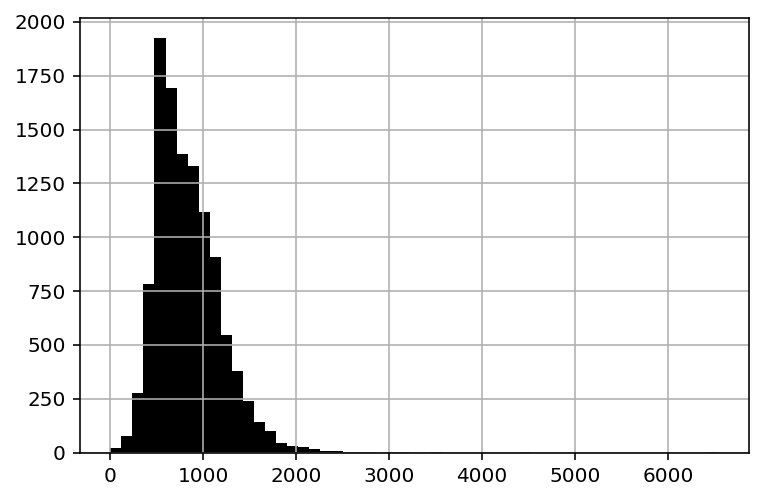

In [365]:
# 가사 길이
# 한글로만 파악(문장 생성에 사용가능한 가사 길이 확인)

df["가사"].str.len().hist(bins=55, color="black")

In [ ]:
# 발라드: 공백 포함 약 300~600자 사이에 가장 많이 분포(종현님)
# 단, 오차 존재

##3. 워드클라우드
- 최빈 단어들을 모아 시각화 (한 자리 단어도 포함: 단, 상위 3개 단어 제외)
- 장르적 특성을 파악할 수 있는 주요한 단서가 될 수 있을 거라 생각

In [64]:
# 워드클라우드

!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [65]:
# konlpy 활용


from konlpy.tag import Kkma

kkma = Kkma()
kkma

In [147]:
# 명사만 남겨서 워드클라우드 돌리기 

from konlpy.tag import Okt
okt = Okt()

In [366]:
# range 안에 숫자 조정: 빈도를 파악하기 위해 인기순으로 1000곡만 가져와 장르별 분석 진행

y = []
for i in range(1000):
    nouns = okt.nouns(lyrics[i])
    y = y + nouns

y[:10]

['스위치', '켜', '주사위', '아무', '몰래', '살짝', '두', '다리', '내', '맘']

In [332]:
# lyrics 1000개 중
# 워드클라우드로 표현하기 위해 key(단어), value(빈도수)로 변환

count={}

for i in y:
    try: count[i] += 1
    except: count[i]=1

print(count)

{'한층': 4, '더': 506, '높이': 35, '듯': 131, '만큼': 67, '이': 641, '시간': 392, '지금': 292, '순간': 209, '난': 1146, '그대': 1231, '손': 328, '술잔': 19, '춤': 48, '오늘': 573, '밤': 701, '흠': 4, '주저': 14, '정말': 151, '아침': 122, '태양': 13, '하루': 369, '요나': 5, '걸음': 71, '두': 130, '발': 51, '걱정': 103, '마': 119, '우리': 864, '언제': 129, '보고': 208, '마음': 820, '내': 2311, '뭐': 180, '나': 2167, '대도': 40, '그': 1047, '만난': 24, '사랑': 1616, '널': 660, '에이': 8, '오우': 6, '맘': 530, '것': 991, '가요': 48, '또': 538, '연락': 30, '집': 133, '가기': 13, '말': 1277, '아마': 52, '햇살': 103, '우릴': 42, '바람': 329, '때': 530, '노을': 54, '진': 21, '하늘': 283, '끝': 165, '걸터': 4, '가슴': 142, '저': 240, '멀리': 141, '조명': 8, '함성': 3, '소리': 151, '무대': 12, '모두': 231, '숨소리': 14, '노래': 319, '사람': 551, '뇌': 3, '별처럼': 15, '머릿속': 25, '마음속': 33, '거': 295, '기억': 305, '아주': 85, '훗날': 23, '힘': 66, '모니터': 2, '화면': 3, '커서': 8, '너': 2460, '뭘': 49, '소설가': 1, '숨': 102, '턱': 6, '총': 2, '속': 422, '탄환': 1, '사냥꾼': 1, '어디': 251, '가나': 10, '곳': 330, '이제': 338, '길': 233, '물속': 4, '몸': 

In [367]:
#  명사라고 여겨지는 것 추출 및 빈도수 별 시리즈 변환
 
y_freq = pd.Series(count)
a = y_freq.sort_values(ascending=False)
a


b = pd.DataFrame(a[(1600 > a)&(a > 10)], columns=["빈도"]) # => 인디 분석할 때 썼던 코드 상위 3개 단어 잘라내기 위한 것
b # ==> 데이터마다 조정해서 사용


,빈도
말,1277
그대,1231
난,1146
날,1060
그,1047
...,...
찰나,11
희망,11
낼,11
서면,11


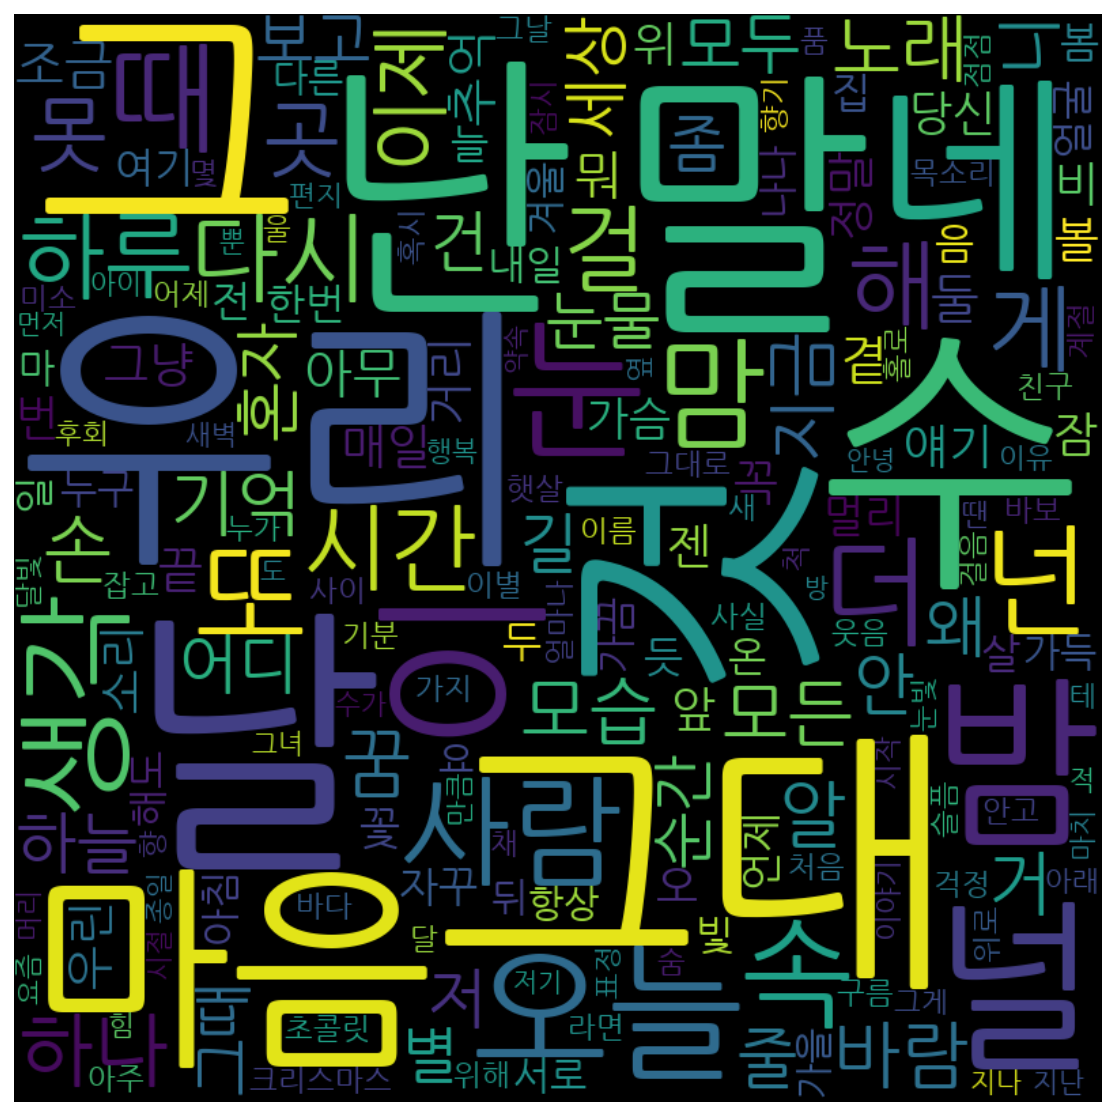

In [368]:
# 워드클라우드 생성


word = pd.DataFrame({"단어" : b.index.tolist(),
              "빈도수": b["빈도"]})

wordcloud = WordCloud(
            font_path="NanumGothic",
            width=800,
            height=800
)
text = " ".join(word["단어"])
keyword = wordcloud.generate(text)

array = keyword.to_array()

plt.figure(figsize=(10, 10))
plt.imshow(
    array,
    interpolation="bilinear"
)
plt.axis("off")
plt.show()

In [369]:
# 워드 클라우드 생성에 사용한 text를 확인하여 각 장르별 특성 파악

text

'말 그대 난 날 그 것 수 우리 마음 네 밤 널 이 오늘 눈 사람 또 때 맘 생각 더 넌 속 다시 해 시간 하루 게 걸 하나 못 이제 곳 바람 손 꿈 노래 모습 알 기억 모든 거 지금 하늘 니 세상 왜 안 어디 저 길 건 모두 혼자 줄 눈물 순간 보고 별 좀 그때 아무 둘 조금 곁 뭐 추억 매일 비 그냥 볼 우린 거리 끝 얘기 잠 젠 앞 위 정말 소리 꼭 당신 번 가슴 오 멀리 꽃 여기 봄 전 살 자꾸 집 얼굴 듯 음 두 한번 언제 내일 일 빛 늘 아침 온 해도 가끔 서로 가득 뒤 나나 누구 마 겨울 다른 요 가을 항상 크리스마스 미소 그대로 친구 기분 처음 목소리 이름 햇살 걱정 숨 사이 척 땐 채 이별 바다 잡고 웃음 사실 바보 초콜릿 구름 그날 아주 새 안고 가지 라면 위해 어제 계절 잠시 향기 몇 혹시 점점 울 얼마나 품 슬픔 달 위로 향 걸음 홀로 그게 이유 만큼 아래 힘 후회 눈빛 테 이야기 표정 누가 옆 편지 달빛 시작 아이 도 지나 머리 적 수가 행복 지난 그녀 새벽 요즘 시절 종일 뿐 마치 저기 안녕 방 먼저 약속 누군가 고백 잠깐 어둠 밤하늘 노을 자리 계속 내겐 만날 간 한참 애 전부 문득 아마 바 몸 의미 창문 몰래 무슨 가장 발 어쩌면 뭘 별빛 술 입술 가요 춤 인생 순 진짜 낙엽 어 준 자꾸만 때문 엄마 두운 그리움 불빛 어깨 바로 입 피어 마주 남아 파 감고 제일 꽃잎 길이 음악 다리 마지막 우릴 날씨 은 한마디 선 저녁 상처 대도 오늘밤 막 고민 문 달라 여름 우주 때론 눈치 물 세월 영화 남자 이상 수도 기도 중 어른 밤새 빈 심장 한숨 그림 겁 창 깊이 높이 산 제발 거기 무엇 여자 간다 아아 꿈속 상상 불 느낌 이해 만 삶 매력 이불 파도 인사 쉬 외로움 찬 후 마음속 선물 그땐 귓가 용기 벌써 창가 다음 사진 아픔 어차피 타고 잔 오직 여보 영원 비밀 기쁨 예전 대로 연락 이슬 대체 간직 달이 커피 한잔 소년 때로는 어딘가 자 데 벚꽃 일도 오지 단 빗 옷 전화 파란 너머 이제야 듯이 욕심 고개 멍하니 텅 굳이 우산 셋 보

##4. 기타 시각화
- 생각치 못한 인사이트를 발견할 수 있기를 바라며
- 정리를 위해 작성 (지영님, 종현님, 자현님 코드 참고 명시, 개별 EDA한 것을 자료로 활용하여 조원들의 노력이 프로젝트에 직접적으로 이어지도록 하기 위함)
- 지영님 코드 👍


In [551]:
# 기타 시각화
# 지영님 코드 참고 명시

L = data["가사"]

# 가사 길이 추가
# 단어 개수 추가
data["가사"] = data["가사"].str.strip()
data["len"] = data["가사"].str.len()

data["word_count"] = L.map(lambda x : len(x.split()))
data["word_count"]

0        191
1        132
2        120
3        126
4        148
        ... 
13341    103
13342    179
13343    150
13344    144
13345    142
Name: word_count, Length: 13130, dtype: int64

In [552]:
data.columns

Index(['제목', '가사', '가수', '발매일', '좋아요수', '장르', 'len', 'word_count'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa684f98820>,
      dtype=object)

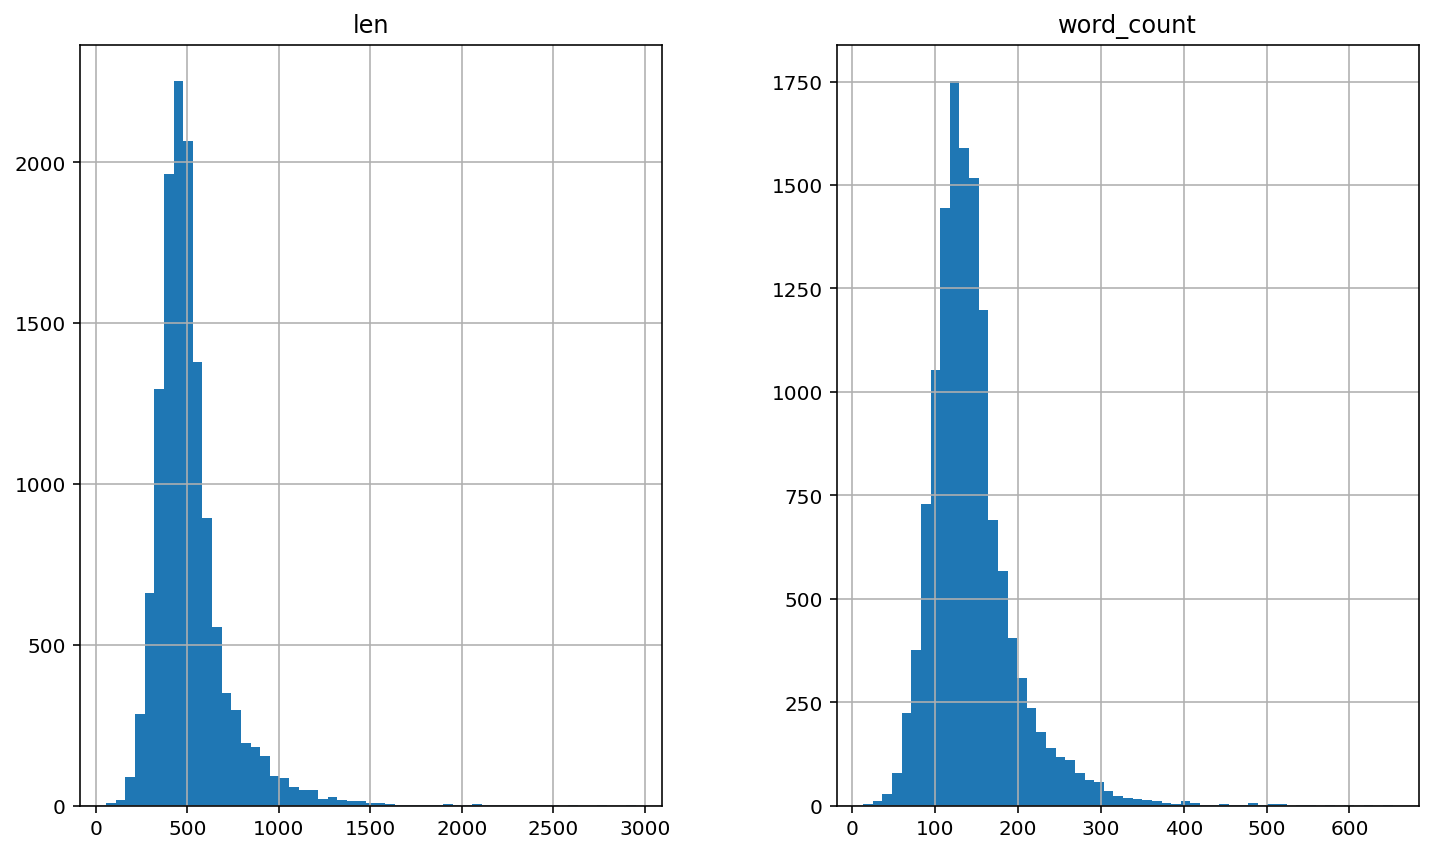

In [553]:
data.hist(bins=55, figsize=(12, 7))

In [554]:
# 영어 비율과 한글 비율 비교하기 위해 한글, 영어, 숫자를 제외한 문자 제거


for i in range(len(data)):
    data["가사"][i] = re.sub("[^A-Za-z0-9가-힣]", " ",data["가사"].iloc[i])

data.head()

<ipython-input-554-575bc2a8a5fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["가사"][i] = re.sub("[^A-Za-z0-9가-힣]", " ",data["가사"].iloc[i])


,제목,가사,가수,발매일,좋아요수,장르,len,word_count
0,Monologue,다 잊었다는 거짓말 또 해 버렸죠 내 마음에 그대란 사람 없다고 했죠 너무나 쉽게 잊혀졌다고 이젠 남이라고 서툰 내 사랑에 지쳐 떠난 그대 너무 많이 울려서 잡을 용기조차 낼 수 없었죠 미안해요 내 사랑아 다신 나 같은 사람 만나지 마요 혹시 찾아가도 두 번 다시 나를 허락해 주지 마요 그댄 여리고 너무 착해서 싫단 말도 잘 못하는데 많이 부족한 나를 사랑한 그대 이거면 됐어요 더 이상은 그대 불행하지 않도록 나 이쯤에서 없어지는 게 그댈 위한 나의 사랑인 걸요 너무 투명해서 때론 불안했죠 제멋대로 살아온 나를 감당할 수 없을 것 같죠 미안해요 내 사랑아 다신 나 같은 사람 만나지 마요 혹시 찾아가도 두 번 다시 나를 허락해 주지 마요 그댄 여리고 너무 착해서 싫단 말도 잘 못하는데 고마웠어요 나를 사랑해 줘서 나 같은 사람이 두 번 다시 감히 받을 수 없는 사랑 그대 때문에 행복했어요 울지 마요 그대 잘 생각해 봐요 나쁜 일들만 가득했던 우리 다 잊어야 해요 다신 나 같은 사람 만나지 마요 혹시 찾아가도 두 번 다시 나를 허락해 주지 마요 그댄 여리고 너무 착해서 싫단 말도 잘 못하는데 많이 부족한 나를 사랑한 그대 이거면 됐어요 더 이상은 그대 불행하지 않도록 나 이쯤에서 없어지는 게 그댈 위한 나의 사랑인 걸요,테이,2022.09.18,"66,062",발라드,633,191
1,너의 모든 순간,이윽고 내가 한눈에 너를 알아봤을 때 모든 건 분명 달라지고 있었어 내 세상은 널 알기 전과 후로 나뉘어 니가 숨 쉬면 따스한 바람이 불어와 니가 웃으면 눈부신 햇살이 비춰 거기 있어줘서 그게 너라서 가끔 내 어깨에 가만히 기대주어서 나는 있잖아 정말 빈틈없이 행복해 너를 따라서 시간은 흐르고 멈춰 물끄러미 너를 들여다 보곤 해 그것 말고는 아무것도 할 수 없어서 너의 모든 순간 그게 나였으면 좋겠다 생각만 해도 가슴이 차올라 나는 온통 너로 보고 있으면 왠지 꿈처럼 아득한 것 몇 광년 동안 날 향해 날아온 별빛 또 지금의 너 거기 있어줘서 그게 너라서 가끔 나에게 조용하게 안겨주어서 나는 있잖아 정말 남김없이 고마워 너를 따라서 시간은 흐르고 멈춰 물끄러미 너를 들여다보곤 해 너를 보는 게 나에게는 사랑이니까 너의 모든 순간 그게 나였으면 좋겠다 생각만 해도 가슴이 차올라 나는 온통 너로 니 모든 순간 나였으면,성시경,2014.02.12,"243,092","발라드, 국내드라마",460,132
2,잘가요,미안해 마요 이제야 난 깨달아요 내 절대 그대 짝이 아님을 괜찮을게요 영혼 밖에 팔 것 없는 못난 날 잘 비켜갔어요 그대 행복 내가 꼭 아니라도 지킨다면 그게 사랑일 테죠 그게 나의 몫이죠 잘 가요 내 소중한 사람 행복했어요 그래도 이것만 알아줘요 지금 그 사랑보다 결코 내 사랑이 부족하다거나 얕지 않음을 잊어도 돼요 나를 만난 시간들은 잠깐의 연극이라 여김을 잘한 거예요 아무리 난 노력해도 작은 희망도 없잖아요 아주 멀리 멀리 뛰어가세요 어떡해요 자꾸 잘못한 일만 떠오르는 걸 잘 가요 내 소중한 사람 행복했어요 그래도 이것만 알아줘요 지금 그 사랑보다 결코 내 사랑이 부족하다거나 얕지 않음을 어긋난 인연이 남겨놓은 사랑이란 날카로운 슬픔이군요 잘 가요 내 사랑아 고마웠어요 그래도 이것만 알아줘요 지금 그 사랑보다 결코 내 사랑이 부족하다거나 얕지 않음을 부족하다거나 얕지 않음을,주호,2022.12.04,"18,702",발라드,442,120
3,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면 그 사람 손길이 자꾸 생각이 난다 붙잡지 못하고 가슴만 떨었지 내 아름답던 사람아 사랑이란 게 참 쓰린 거더라 잡으려 할수록 더 멀어지더라 이별이란 게 참 쉬운 거더라 내 잊지 못할 사람아 사랑아 왜 도망가 수줍은 아이처럼 행여 놓아버릴까 봐 꼭 움켜쥐지만 그리움이 쫓아 사랑은 늘 도망가 잠시 쉬어가면 좋을 텐데 바람이 분다 옷깃을 세워도 차가운 이별의 눈물이 차올라 잊지 못해서 가슴에 사무친 내 소중했던 사람아 사랑아 왜 도망가 수줍은 아이처럼 행여 놓아버릴까 봐 꼭 움켜쥐지만 그리움이 쫓아 사랑은 늘 도망가 잠시 쉬어가면 좋을 텐데 기다림도 애태움도 다 버려야 하는데 무얼 찾아 이 길을 서성일까 무얼 찾아 여기 있나 사랑아 왜 도망가 수줍은 아이처럼 행여 놓아버릴까 봐 꼭 움켜쥐지만 그리움이 쫓아 사랑은 늘 도망가 잠시 쉬어가면 좋을 텐데 잠시 쉬어가면 좋을 텐데,임영웅,2021.10.11,"185,585","발라드, 국내드라마",450,126
4,해요 (2022),그녀와 나는요 그땐 참 어렸어요 많이 사랑했고 때론 많이 다퉜었죠 지금 생각하면 모두 내 잘못이죠 마지막 그날도 그녀는 울었어 나는 그녈 잡지 못했죠 지금까지도 너무 후회가 돼요 그 후로 누굴 사랑한 적 없어 아직은 그녀와 나는요 언젠가 만날 거죠 변해버린 모습 변해버린 시간 속에 하지만 괜찮아 내 눈엔 아름답던 예전 모습 그대로 일 거예요 그녀도 날 못 잊을 거야 나는 믿어요 그만큼 사랑했죠 그래서 우린 한 번은 만나야만 해요 그녀의 친구라도 이 노랠 듣는다면 그녀에게 전해줘요 내가 아직 사랑한다고 우리가 처음 만난 그 시간 그 자리에 내가 매일 기다린다고 언제라도 그녀도 날 못 잊을 거야 나는 믿어요 그만큼 사랑했죠 그래서 우린 한 번은 만나야만 해요 그녀의 친구라도 이 노랠 듣는다면 그녀에게 전해줘요 내가 아직 사랑한다고 우리가 처음 만난 그 시간 그 자리에 내가 매일 기다린다고 그녀의 친구라도 이 노랠 듣는다면 그녀에게 전해줘요 내가 아직 사랑한다고 우리가 처음 만난 그 시간 그 자리에 내가 매일 기다린다고 내가 매일 기다린다고,#안녕,2022.06.07,"63,808","발라드, 인디음악",530,148


In [555]:

data["가사개행제거"] = data["가사"].map(lambda x: (" ".join(x.split("\r\n")).strip()))
data["가사개행제거"].sample(2)



10540    집으로 돌아오는 밤 거리에 하얀 달빛이 스민다 수없이 거닐던 하루 변한 건 너 하나인데 불쑥 달라진 오래된 풍경들 잔잔한 바람에 어려온 너의 향기에 난 물결이 인다 천천히 나도 몰래 사뭇 밀려든 내겐 특별한 너의 흔한 이야기들 살며시 너를 안는 상상을 하다가 가슴이 벅차올라 너의 모든 게 깊어지려나 보다 알 수 없는 내 마음이 애태우는 이 순간이 너를 재우고 긴 밤을 지새우다 조금씩 알게 됐지 아마 난 너를 사랑할 거라고 살며시 너를 안는 상상을 하다가 가슴이 벅차올라 너의 모든 게 깊어지려나 보다 어지러운 내 마음이 위태로운 이 순간이 너를 재우고 긴 밤을 지새우다 조금씩 알게 됐지 내일은 너를 사랑할 거라고 너의 모든 게 소중해지려나 보다 나를 보는 너의 눈이 닿는 모든 이 순간이 너를 꽉 안고 두 눈을 꼭 감아보다 비로소 깨달았지 난 더없이 너를 사랑 사랑한다고
2789                                                                                                                             사랑 이 아픈 길 위 그만 돌아가려 해 결코 쉽지 않을 먼 걸음이 될 걸 알아 참 버겁겠지 아파 숨이 차겠지 돌아 보지 않아 say goodbye 어쩌면 우린 최선을 위한 이별인 걸까 서로 아프지 않게 놓아주는 것이 사랑이었을까 언젠간 다시 만나 밤새 모아둔 그리움 품에 잠들 때 그때 다시 만나 Say goodbye 알아 끝이 아닌 걸 이제 내 몫이란 걸 혼자 감당하는 마지막 어쩌면 우린 최선을 위한 이별인 걸까 서로 아프지 않게 놓아주는 것이 사랑이었을까 언젠간 다시 만나 밤새 모아둔 그리움 품에 잠들 때 그때 다시 만나 Say goodbye 이제는 안녕
Name: 가사개행제거, dtype: object

In [556]:
# 지영님 코드

english = re.compile(r'[a-zA-Z]')
korean = re.compile(r'[가-힣]')
number = re.compile(r'[0-9]')

def check_word_kind(dancd_lyrics):
    eng = 0
    kor = 0
    num = 0
    etc = 0
    
    for word in dancd_lyrics:
        if korean.match(word):
            kor += 1
        elif english.match(word):
            eng += 1
        elif word.isdigit():
            num += 1    
        else:
            etc += 1

    return [kor, eng, num, etc]


In [557]:


data["가사의단어들"] = data["가사개행제거"].map(lambda x : x.split())
data["가사의단어들"].sample(1)



11628    [이, 사람은, 절대, 안돼, 절대, 안돼, 내, 눈에, 흙이, 들어가기, 전에는, 안돼, 이건, 절대, 용납, 못해, 용납, 못해, 헤어져, 당장, 나중에, 다치기, 전에, 이, 사람은, 절대, 안돼, 절대, 안돼, 내, 눈에, 흙이, 들어가기, 전에는, 안돼, 절대, 용납, 못해, 용납, 못해, 헤어져, 당장, 나중에, 다치기, 전에, 어디서, 저런, 앨, 데려왔니, 머리가, 분홍색, 가슴이, 다, 보일, 것, 같이, 패인, 티셔츠에, 얼굴엔, 온통, 검은색, 화장이, 뒤덮여, 그렇지, 않아도, 흉한데, 눈, 코, 입, 귀, 다, 뚫려, 부모도, 없어, 그러니, 뭘, 보고, 배웠겠어, 학교도, 다, 그만두고, 그런, 앨, 도대체, 어따, 써, 될, 수가, 없어, 어느, 정도야, 말이지, 내, 말, 들어, 어서, 그래야, 내가, 얼굴, 들고, ...]
Name: 가사의단어들, dtype: object

In [558]:


temp = data["가사의단어들"].sample(1).tolist()
temp = temp[0]
temp[:10]



['괜찮아', '자유롭게', '자', '훨훨', '바람을', '따라', '지켜볼게', '할', '수', '있도록']

In [559]:

check_word_kind(temp)


[150, 76, 0, 0]

In [560]:
def word_kind_count(df):
    kor_eng_num_etc = pd.DataFrame(df["가사의단어들"].map(check_word_kind))
    df["kor_num"] = kor_eng_num_etc["가사의단어들"].str[0]
    df["eng_num"] = kor_eng_num_etc["가사의단어들"].str[1]
    df["num_num"] = kor_eng_num_etc["가사의단어들"].str[2]
    df["etc_num"] = kor_eng_num_etc["가사의단어들"].str[3]

In [561]:
word_kind_count(data)

In [562]:
kor_eng_etc = pd.DataFrame(data["가사의단어들"].map(check_word_kind))
kor_eng_etc

,가사의단어들
0,"[191, 0, 0, 0]"
1,"[132, 0, 0, 0]"
2,"[120, 0, 0, 0]"
3,"[126, 0, 0, 0]"
4,"[148, 0, 0, 0]"
...,...
13341,"[103, 0, 0, 0]"
13342,"[140, 37, 0, 2]"
13343,"[150, 0, 0, 0]"
13344,"[108, 36, 0, 0]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa68e284e50>,
      dtype=object)

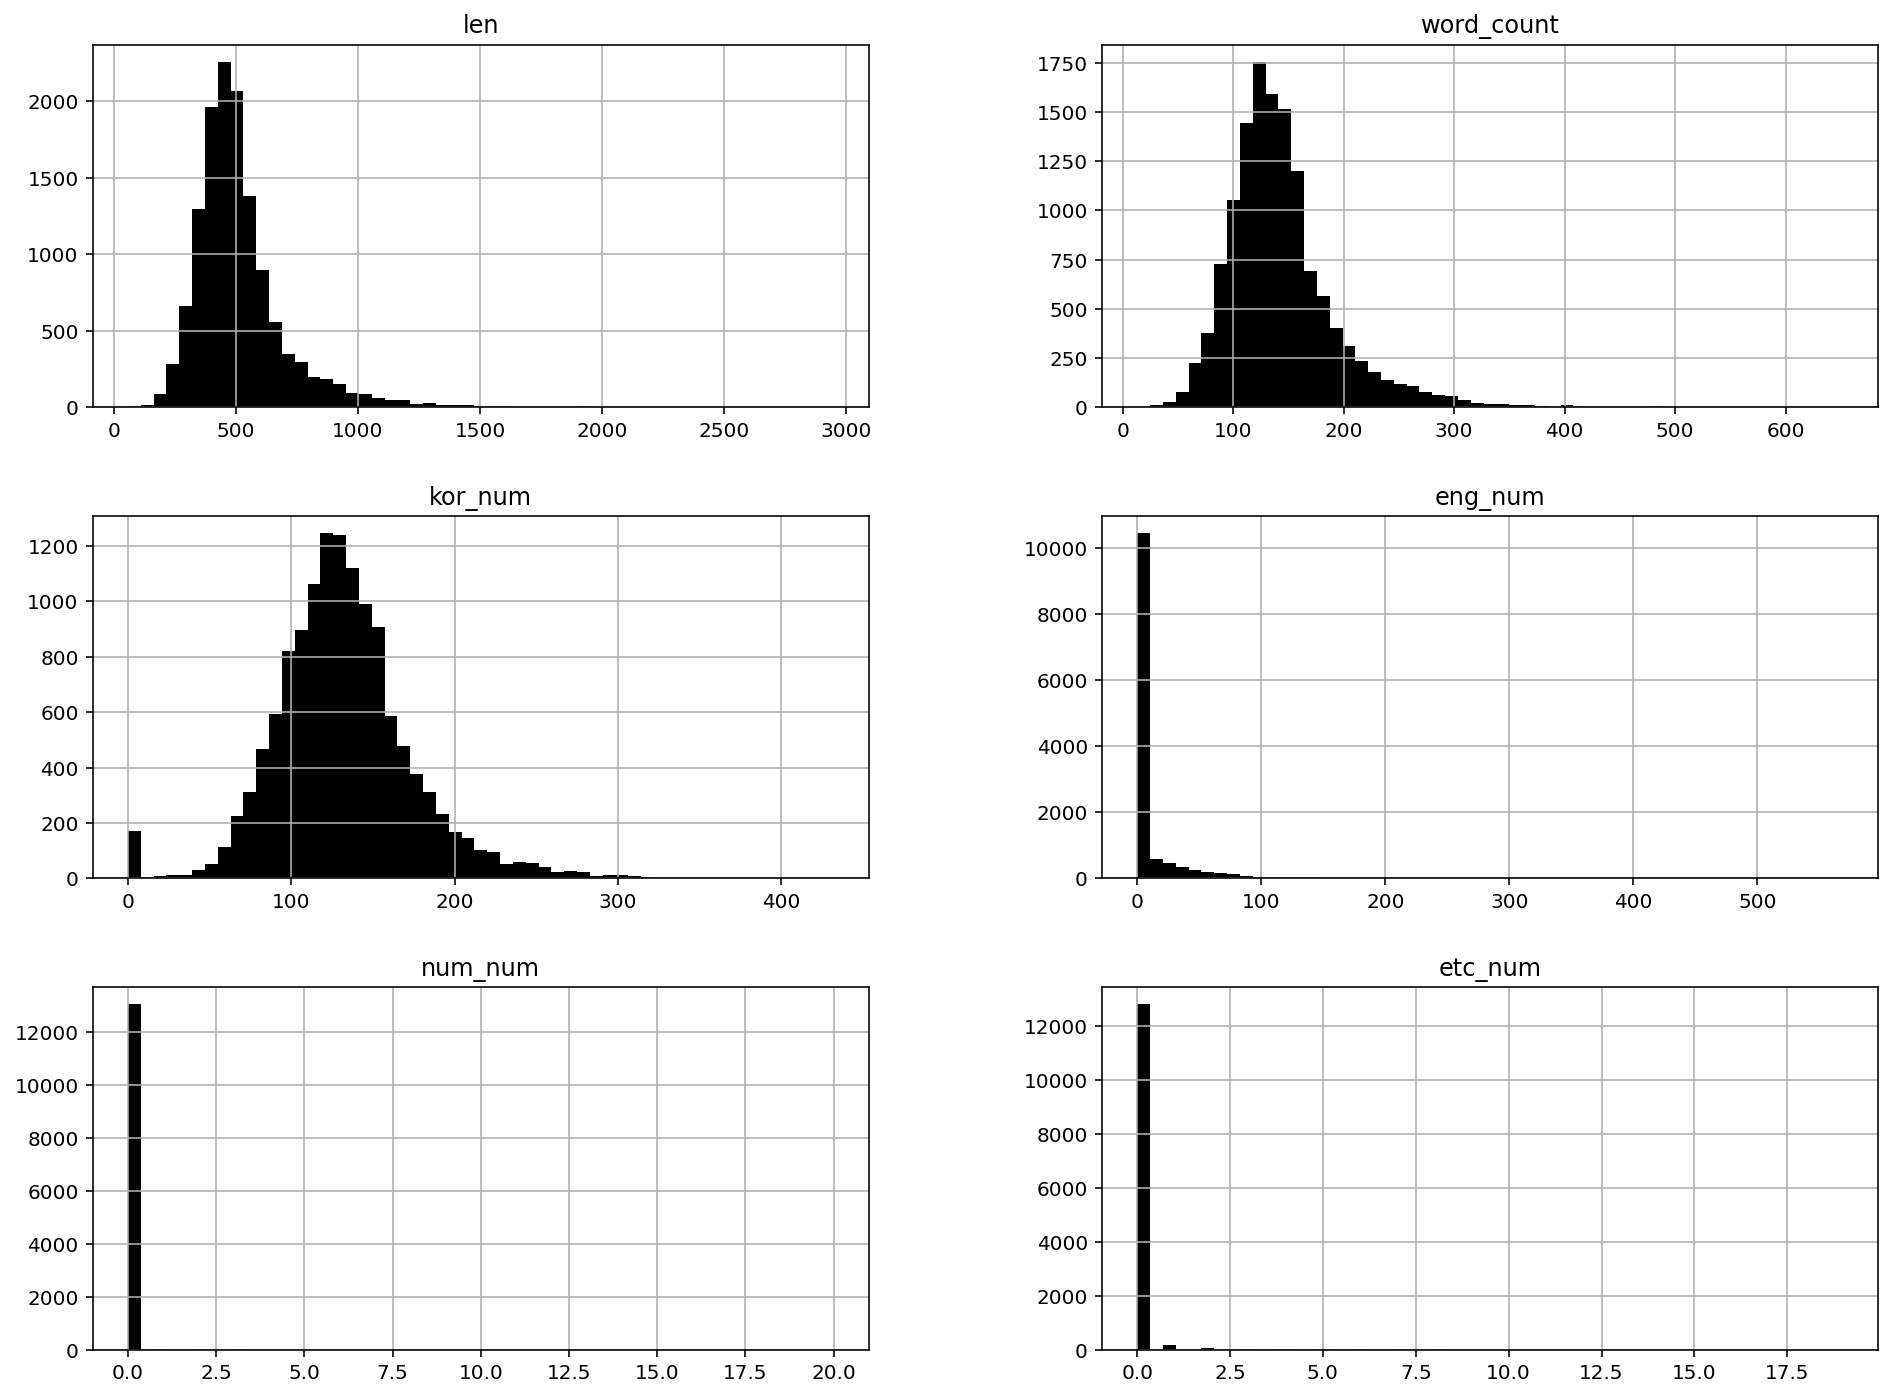

In [563]:
data["kor_num"] = kor_eng_etc["가사의단어들"].str[0]
data["eng_num"] = kor_eng_etc["가사의단어들"].str[1]
data["num_num"] = kor_eng_etc["가사의단어들"].str[2]
data["etc_num"] = kor_eng_etc["가사의단어들"].str[3]


data.hist(figsize=(16,12), bins=55, color='black')

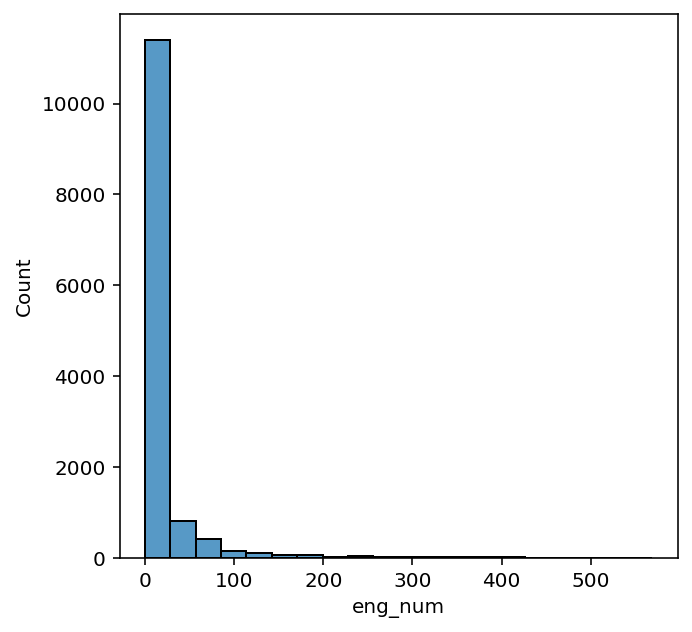

In [564]:
# seaborn이 시각적으로 나음


plt.figure(figsize=(5, 5))
sns.histplot(data=data, x="eng_num", bins=20) #장르마다 바꿔주기


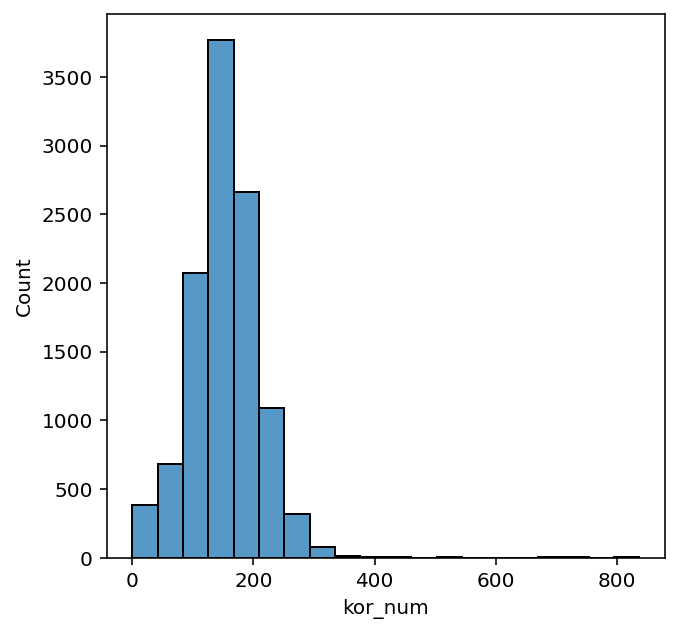

In [385]:
plt.figure(figsize=(5, 5))
sns.histplot(data=data, x="kor_num", bins=20)

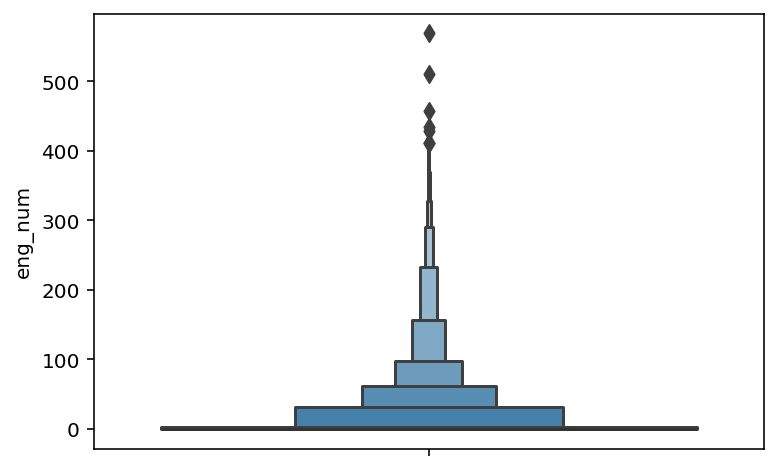

In [565]:
sns.boxenplot(data=data, y="eng_num")

In [568]:
data[['kor_num', 'eng_num', 'etc_num', 'num_num']].describe()

,kor_num,eng_num,etc_num,num_num
count,13130.000000,13130.000000,13130.000000,13130.000000
mean,131.845849,12.792765,0.052323,0.014775
std,43.011217,38.189986,0.455922,0.306471
min,0.000000,0.000000,0.000000,0.000000
25%,106.000000,0.000000,0.000000,0.000000
50%,129.000000,0.000000,0.000000,0.000000
75%,153.000000,3.000000,0.000000,0.000000
max,432.000000,569.000000,19.000000,20.000000


In [569]:
# 한글이 아닌 단어의 비율

data["not_kor"] = (data['eng_num'] + data['etc_num'] + data['num_num']) / data["word_count"] * 100
data["not_kor"][:10]



0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    4.669261
Name: not_kor, dtype: float64

<Figure size 360x1296 with 0 Axes>

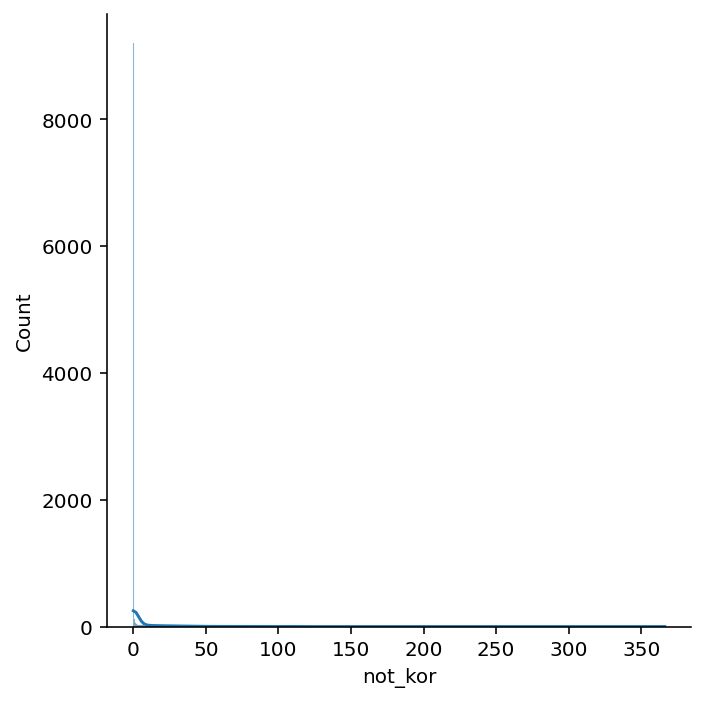

In [570]:
plt.figure(figsize=(5, 18))
sns.displot(data=data, x="not_kor", kde=True)
plt.show()

In [209]:
# 

temp_pos = okt.pos(data["가사개행제거"][0])
temp_pos[:10]



[('저', 'Noun'),
 ('멀리', 'Noun'),
 ('동해', 'Noun'),
 ('바다', 'Noun'),
 ('외로운', 'Adjective'),
 ('섬', 'Noun'),
 ('오늘', 'Noun'),
 ('도', 'Josa'),
 ('거', 'Noun'),
 ('센', 'Verb')]

In [210]:
def count_pos(Lyrics):
    noun = 0
    verb = 0
    adjective = 0 #형용사
    adverb = 0 #부사
    etc = 0

    for word in Lyrics:
        if word[1] == "Noun":
            noun += 1
        elif word[1] == "Verb":
            verb += 1
        elif word[1] == "Adjective":
            adjective += 1
        elif word[1] == "Adverb":
            adverb += 1
        else:
            etc += 1
        
    return noun, verb, adjective, adverb, etc

count_pos(temp_pos)



(61, 37, 4, 4, 21)

In [211]:
# 상위 100개 노래 가사만 가져와서 분석

data_100 = data.head(100)
data_100.shape

(100, 12)

In [212]:
data_100["형태소"] = data_100["가사개행제거"].map(okt.pos)
data_100["형태소"][:2]

<ipython-input-212-243e01241f5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100["형태소"] = data_100["가사개행제거"].map(okt.pos)


0                          [(저, Noun), (멀리, Noun), (동해, Noun), (바다, Noun), (외로운, Adjective), (섬, Noun), (오늘, Noun), (도, Josa), (거, Noun), (센, Verb), (바람, Noun), (불어오겠지, Verb), (조그만, Noun), (얼굴, Noun), (로, Josa), (바람, Noun), (맞으니, Verb), (독도, Noun), (야, Josa), (간밤, Noun), (에, Josa), (잘, Verb), (잤느냐, Verb), (아리랑, Noun), (아리랑, Noun), (홀로아리랑, Noun), (아리랑, Noun), (고개, Noun), (를, Josa), (넘어가, Verb), (보자, Verb), (가다가, Noun), (힘들면, Adjective), (쉬어, Verb), (가더라도, Verb), (손잡고, Verb), (가보자, Verb), (같이, Adverb), (가보자, Verb), (금강산, Noun), (맑은, Noun), (물, Noun), (은, Josa), (동해, Noun), (로, Josa), (흐르고, Verb), (설악산, Noun), (맑은, Noun), (물, Noun), (도, Josa), (동해, Noun), (가는데, Verb), (우리네, Noun), (마음, Noun), (들, Suffix), (은, Josa), (어디, Noun), (로, Josa), (가는가, Verb), (언제, Noun), (쯤, Suffix), (우리, Noun), (는, Josa), (하나, Noun), (가, Josa), (될까, Verb), (아리랑, Noun), (아리랑, Noun), (홀로아리랑, Noun), (아리랑, Noun), (고개, Noun), (를, Josa), (넘어가, Verb), (보자, Verb), (가다가, Noun), (힘들면, Adjective), (쉬어, Verb), (가더라도, Verb),

In [213]:
data_pos = data_100["형태소"].map(count_pos)
data_pos

0        (61, 37, 4, 4, 21)
1       (87, 29, 37, 1, 36)
2       (135, 23, 8, 7, 57)
3       (99, 53, 16, 4, 81)
4       (127, 20, 4, 8, 57)
               ...         
99      (59, 24, 12, 8, 38)
100       (43, 6, 7, 5, 25)
101    (107, 45, 12, 5, 54)
102      (68, 20, 3, 1, 29)
103     (106, 20, 2, 0, 44)
Name: 형태소, Length: 100, dtype: object

In [214]:
# noun, verb, adjective, adverb, etc
data_100["명사"] = data_pos.str[0]
data_100["동사"] = data_pos.str[1]
data_100["형용사"] = data_pos.str[2]
data_100["부사"] = data_pos.str[3]
data_100["기타형태소"] = data_pos.str[4]



data_100[['형태소', '명사', '동사', '형용사', '부사']].describe()

<ipython-input-214-da624e7cfb36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100["명사"] = data_pos.str[0]
<ipython-input-214-da624e7cfb36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_100["동사"] = data_pos.str[1]
<ipython-input-214-da624e7cfb36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,명사,동사,형용사,부사
count,100.000000,100.000000,100.000000,100.000000
mean,81.790000,28.980000,8.730000,3.880000
std,38.227204,14.636318,7.181422,4.003231
min,27.000000,6.000000,0.000000,0.000000
25%,54.000000,20.000000,3.750000,1.000000
50%,75.000000,25.500000,7.000000,3.000000
75%,105.000000,36.000000,12.000000,5.250000
max,209.000000,88.000000,37.000000,21.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_

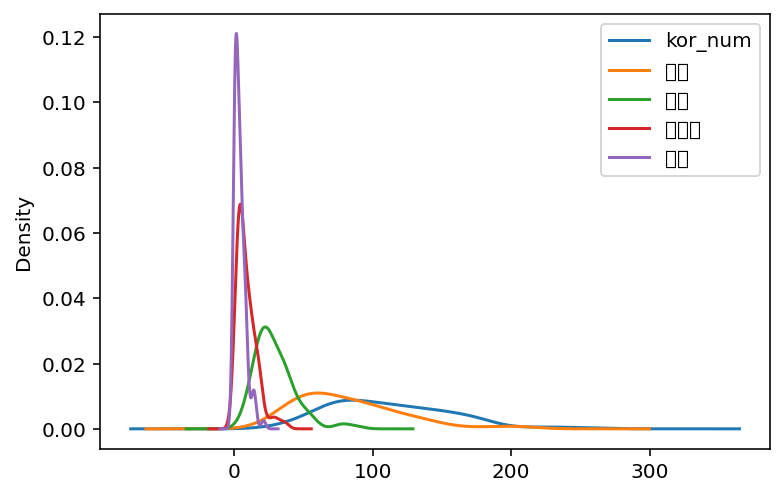

In [435]:
# plot

data_100[['kor_num', '형태소', '명사', '동사', '형용사', '부사']].plot(kind="kde")

##5. 정리
1) 종합
- 
- 
- 
- 

2) 결론
- 발라드 가사를 모델 학습 데이터로 선정하는 이유는 

    ㄱ. 가

    ㄴ. 나

    ㄷ. 다

    ㄹ. 라

    위와 같다.

-

**
추후 발라드 데이터를 활용하여 직접적인 

-권소희 작성